In [1]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())

# List of fd approximants that are currently available
print(fd_approximants())

# Note that these functions only print what is available for your current
# processing context. If a waveform is implemented in CUDA or OpenCL, it will
# only be listed when running under a CUDA or OpenCL Scheme.

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_RO

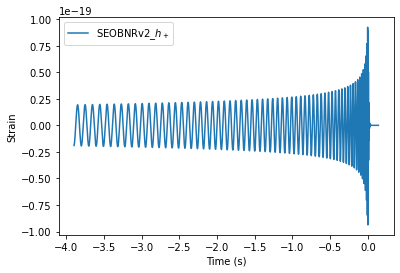

In [2]:
#### import pylab
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from pycbc.waveform import get_td_waveform

dt = 1./4096

for apx in ['SEOBNRv2']:#, 'IMRPhenomC']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=40,
                                 mass2=40,
                                 spin1z=0.9,
                                 delta_t= dt,
                                 f_lower=10, #Lowest frequency
                                 distance = 10 # Luminosity Distance in Mpc
                            )

    plt.plot(hp.sample_times, hp, label=apx+'_$h_+$')
    #plt.plot(hp.sample_times, hc, label=apx+'_$h_x$')

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [3]:
t = np.asarray(hp.sample_times)
#h = np.asarray(hp[t<0])
h = np.asarray(hp)
t0= t #t[t<0]
analytic_signal = hilbert(h)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi* dt))

(0.0, 120.0)

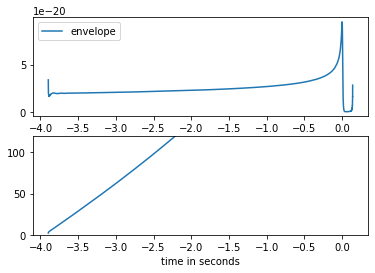

In [7]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
#ax0.plot(t0[1:], instantaneous_frequency, label='frequency')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
#ax1.plot(t[1:],instantaneous_frequency)
ax1.plot(t,instantaneous_phase)
ax1.set_xlabel("time in seconds")
#ax1.set_ylim(0.0, 400.0)
#ax2 = fig.add_subplot(313)
#ax2.plot(t, instantaneous_phase)
#ax2.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

[ 94.53227903 341.83405764]
54.404579989853005
0.2844994192856163


Text(0, 0.5, '\\hat{m(t)}')

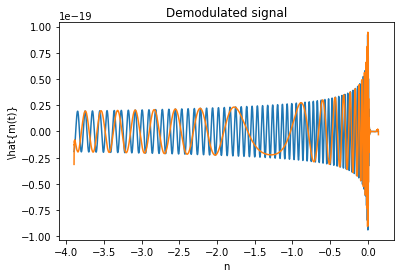

In [8]:
order = 1
fit = np.polyfit(t0,instantaneous_phase,order)
print(fit)
p = np.poly1d(fit) #fit constant offset to the instaneous phase
phi_c = fit[0]
if order > 0: print(fit[1]/2/np.pi)
print(np.mod(phi_c,2*np.pi))
estimated = p(t0) #re-evaluate the offset term using the fitted values
offsetTerm = estimated
demodulated = instantaneous_phase - offsetTerm
signal= np.cos(demodulated+estimated)*np.abs(analytic_signal)
plt.figure()
plt.plot(t0,signal) #demodulated signal
plt.plot(t0,np.cos(demodulated)*np.abs(analytic_signal)) 
plt.title('Demodulated signal')
plt.xlabel('n')
plt.ylabel('\hat{m(t)}')